# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Create output file
output_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []
coord = []
lat = []
lng = []
temp = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")

        pass
              
# Indicate that Data Loading is complete 

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova sintra
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | lobujya
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | port moresby
Processing Record 10 of Set 1 | coahuayana de hidalgo
Processing Record 11 of Set 1 | cozumel
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | ingeniero guillermo n. juarez
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | fort st. john
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | jasper
Processing Record 21 of Set 1 | usinsk
Processing Record 22 of S

Processing Record 39 of Set 4 | la sarre
Processing Record 40 of Set 4 | johi
Processing Record 41 of Set 4 | gambiran satu
Processing Record 42 of Set 4 | domna
Processing Record 43 of Set 4 | cold springs
Processing Record 44 of Set 4 | solnechnyy
Processing Record 45 of Set 4 | ust'-kut
Processing Record 46 of Set 4 | ulsteinvik
Processing Record 47 of Set 4 | szczawnica
Processing Record 48 of Set 4 | lionel town
Processing Record 49 of Set 4 | waddan
Processing Record 0 of Set 5 | ariyalur
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | hermanus
Processing Record 3 of Set 5 | kinablangan
Processing Record 4 of Set 5 | buabidi
City not found. Skipping...
Processing Record 5 of Set 5 | saipan
Processing Record 6 of Set 5 | praia da vitoria
Processing Record 7 of Set 5 | gamba
Processing Record 8 of Set 5 | ratnagiri
Processing Record 9 of Set 5 | dongcun
Processing Record 10 of Set 5 | al ghayzah
Processing Record 11 of Set 5 | fukuecho
Processing Record 12 of

Processing Record 30 of Set 8 | uturoa
Processing Record 31 of Set 8 | brisas de zicatela
Processing Record 32 of Set 8 | chui
Processing Record 33 of Set 8 | monrovia
Processing Record 34 of Set 8 | el granada
Processing Record 35 of Set 8 | moapa valley
Processing Record 36 of Set 8 | port saint john's
Processing Record 37 of Set 8 | remire-montjoly
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | statesville
Processing Record 40 of Set 8 | calolbon
Processing Record 41 of Set 8 | pemangkat
Processing Record 42 of Set 8 | belozersk
Processing Record 43 of Set 8 | camana
Processing Record 44 of Set 8 | arteche
Processing Record 45 of Set 8 | burutu
Processing Record 46 of Set 8 | prainha
Processing Record 47 of Set 8 | zouerate
Processing Record 48 of Set 8 | nur-sultan
Processing Record 49 of Set 8 | taitung city
Processing Record 0 of Set 9 | saint-joseph
Processing Record 1 of Set 9 | labytnangi
Processing Record 2 of Set 9 | olutanga
Processing Record 3

Processing Record 18 of Set 12 | shajiang
Processing Record 19 of Set 12 | kavieng
Processing Record 20 of Set 12 | egersund
Processing Record 21 of Set 12 | gweru
Processing Record 22 of Set 12 | ubinskoye
Processing Record 23 of Set 12 | tazacorte
Processing Record 24 of Set 12 | ivdel'
Processing Record 25 of Set 12 | nieuw amsterdam
Processing Record 26 of Set 12 | peniche
Processing Record 27 of Set 12 | ad dabbah
Processing Record 28 of Set 12 | pokachi
Processing Record 29 of Set 12 | puerto san jose
Processing Record 30 of Set 12 | san mateo del mar
Processing Record 31 of Set 12 | pursat
Processing Record 32 of Set 12 | hotan
Processing Record 33 of Set 12 | lodwar
Processing Record 34 of Set 12 | tralee
Processing Record 35 of Set 12 | karachi
Processing Record 36 of Set 12 | aldinga beach
Processing Record 37 of Set 12 | kisangani
Processing Record 38 of Set 12 | belmonte
Processing Record 39 of Set 12 | port shepstone
Processing Record 40 of Set 12 | khorugh
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": cities,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind": city_wind,
    "Country": city_country,
    "Date": city_date,
    
    
})

#Drop any cities that were skipped in the previous response
city_data_df = city_data_df.dropna(how="any")

# Show Record Count
city_data_df.count()

City          632
Lat           632
Lng           632
Max Temp      632
Humidity      632
Cloudiness    632
Wind          632
Country       632
Date          632
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,nova sintra,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571
1,adamstown,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571
2,lihue,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571
3,port-aux-francais,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571
4,ushuaia,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind,Country,Date
City_ID,,,,,,,,,
0,nova sintra,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571
1,adamstown,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571
2,lihue,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571
3,port-aux-francais,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571
4,ushuaia,-21.0595,164.8658,66.43,66,66,6.91,NC,1690453571


In [8]:
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [9]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,73.98,83,29,10.76,CV,1690452461
1,adamstown,-25.0660,-130.1015,66.87,60,12,5.19,PN,1690452462
2,lihue,21.9789,-159.3672,80.19,80,75,14.97,US,1690452415
3,port-aux-francais,-49.3500,70.2167,41.63,90,70,38.36,TF,1690452463
4,ushuaia,-54.8000,-68.3000,29.86,69,0,9.22,AR,1690452464


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

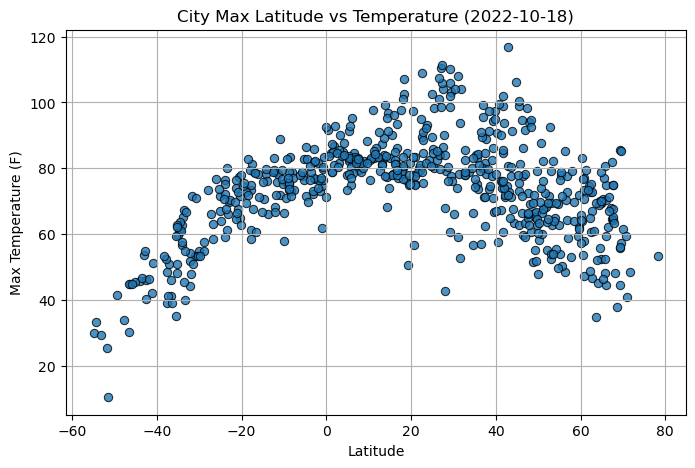

In [10]:
# Build scatter plot for latitude vs. temperature
# date_now = datetime.date(datetime.now())

x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

fig1, ax1 = plt.subplots(figsize=(8,5))

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolor="black", linewidth=.75, marker="o", alpha=0.8)
plt.title(f"City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
          

# Save the figure
plt.savefig("./output_data/latitude_vs_max_temp.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

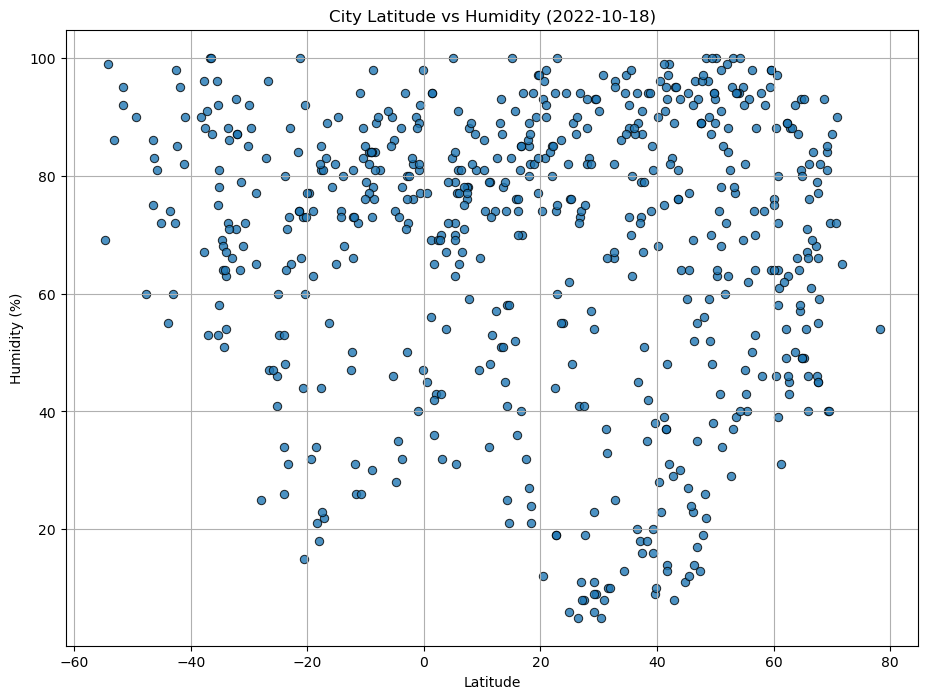

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

fig1, ax1 = plt.subplots(figsize=(11,8))

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolor="black", linewidth=.75, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
          

# Save the figure
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

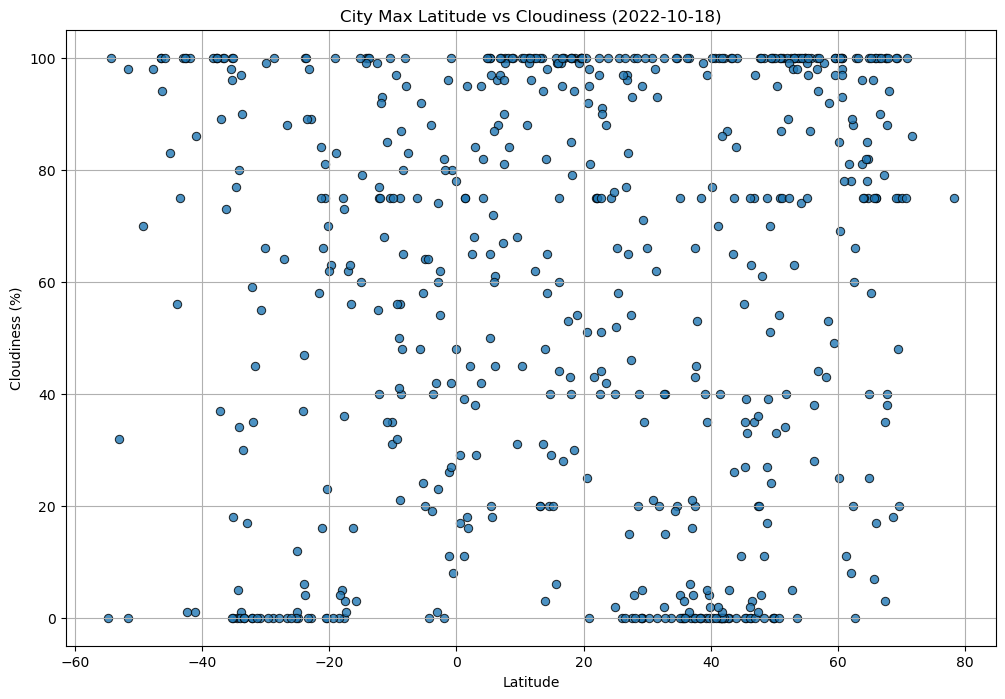

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(12,8))

# Incorporate the other graph properties

plt.scatter(x_values, y_values, edgecolor="black", linewidth=.75, marker="o", alpha=0.8)
plt.title(f"City Max Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
          

# Save the figure
plt.savefig("./output_data/latitude_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

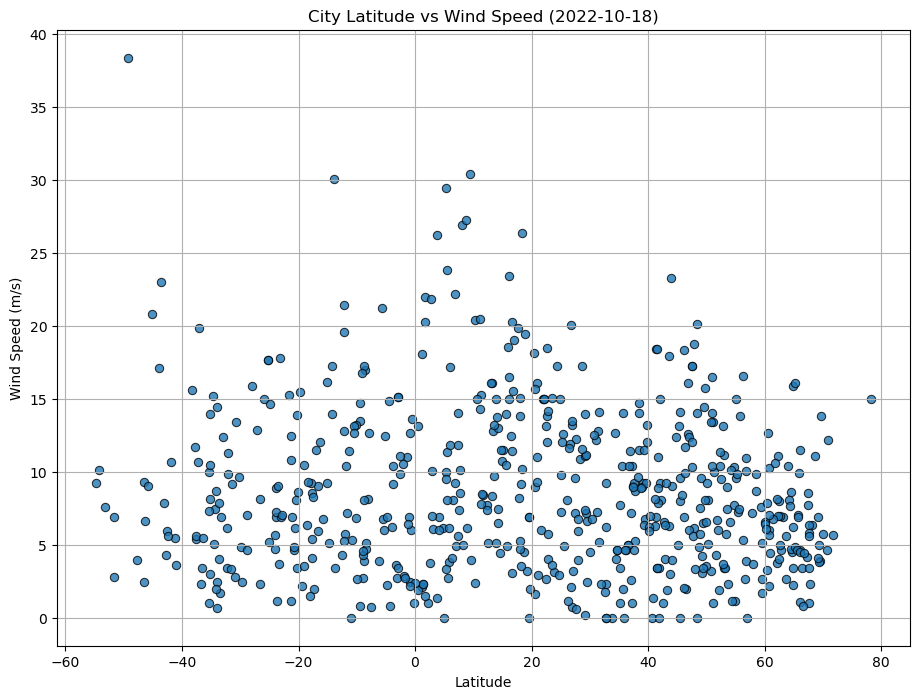

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(11,8))

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolor="black", linewidth=.75, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
          

# Save the figure
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    
    # Add in labels 
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    
#     if ylim is not None:
#         plt.ylim(0, ylim)
#     plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    
    print(f"The r-value is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,73.98,83,29,10.76,CV,1690452461
2,lihue,21.9789,-159.3672,80.19,80,75,14.97,US,1690452415
5,lobujya,27.9500,86.8167,42.58,93,100,5.95,NP,1690452464
6,bethel,41.3712,-73.4140,73.90,91,0,6.91,US,1690452465
9,coahuayana de hidalgo,18.7000,-103.6583,76.33,94,100,4.47,MX,1690452467


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,adamstown,-25.0660,-130.1015,66.87,60,12,5.19,PN,1690452462
3,port-aux-francais,-49.3500,70.2167,41.63,90,70,38.36,TF,1690452463
4,ushuaia,-54.8000,-68.3000,29.86,69,0,9.22,AR,1690452464
7,grytviken,-54.2811,-36.5092,33.19,99,100,10.09,GS,1690452466
8,port moresby,-9.4431,147.1797,75.72,84,97,13.49,PG,1690452466


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.29067187664483285
The correlation between both factors is -0.54


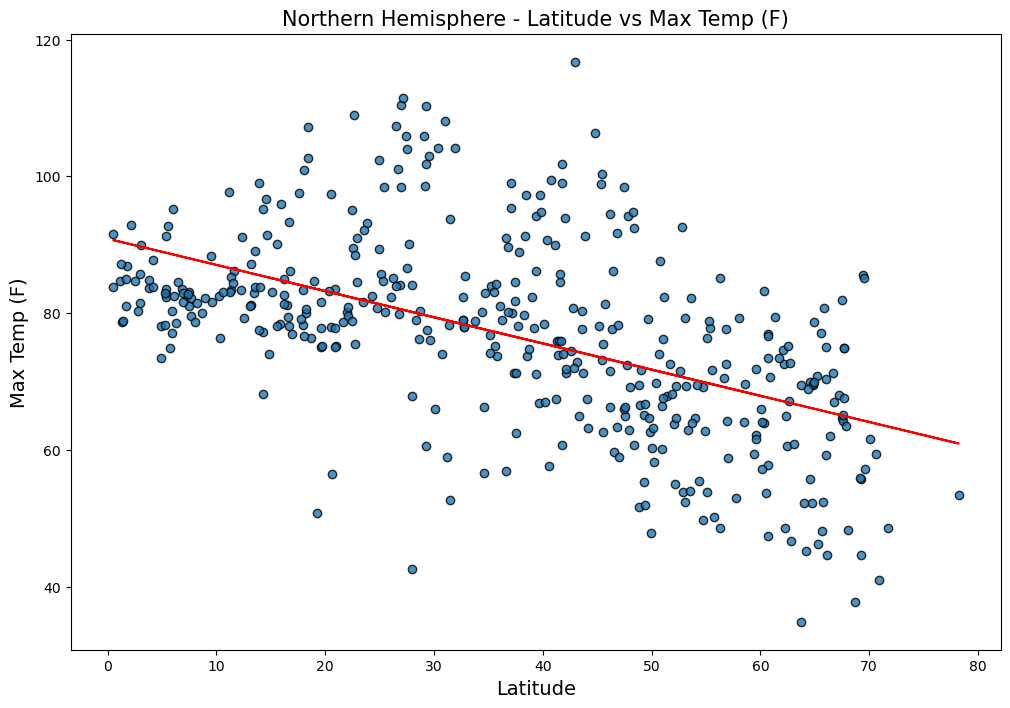

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (-5,10))


# Save the output to png
plt.savefig("./output_data/northern_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

The r-value is: 0.7217221535388775
The correlation between both factors is 0.85


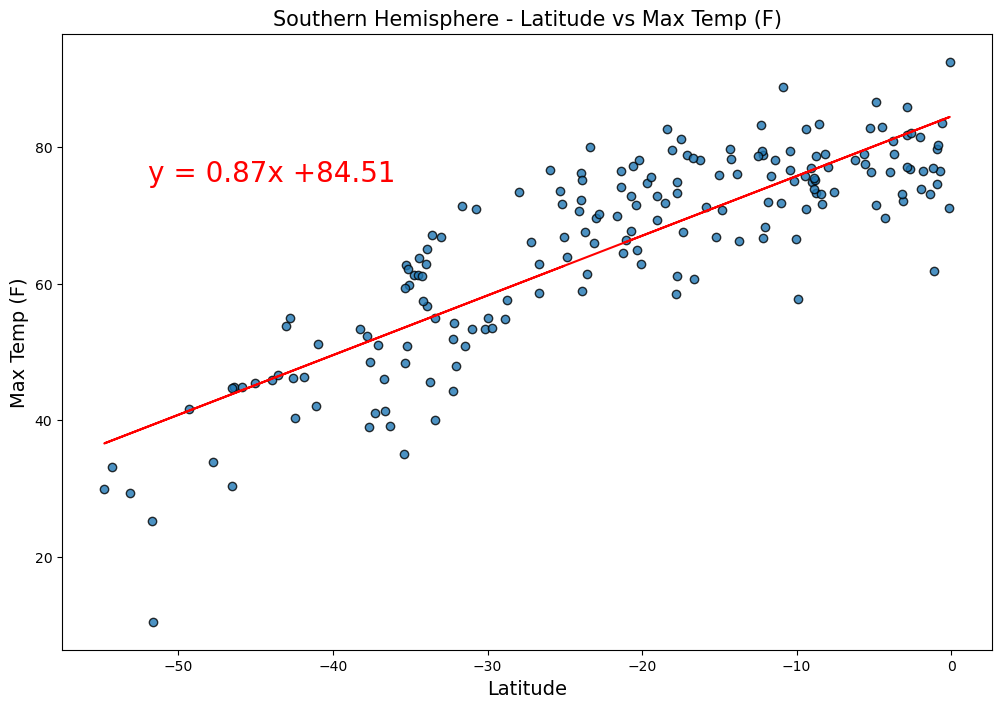

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the output to png
plt.savefig("./output_data/southern_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** From looking at the r value in both hemispheres, it it evident that there is a strong correlation between the lattitude and the maximum temperature. In the southern hemisphere, the correlation is stronger (r value .77) indicating that as we get further away from the equator, the temperature decreases in a more linear manner.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 2.4217816318337504e-06
The correlation between both factors is 0.0


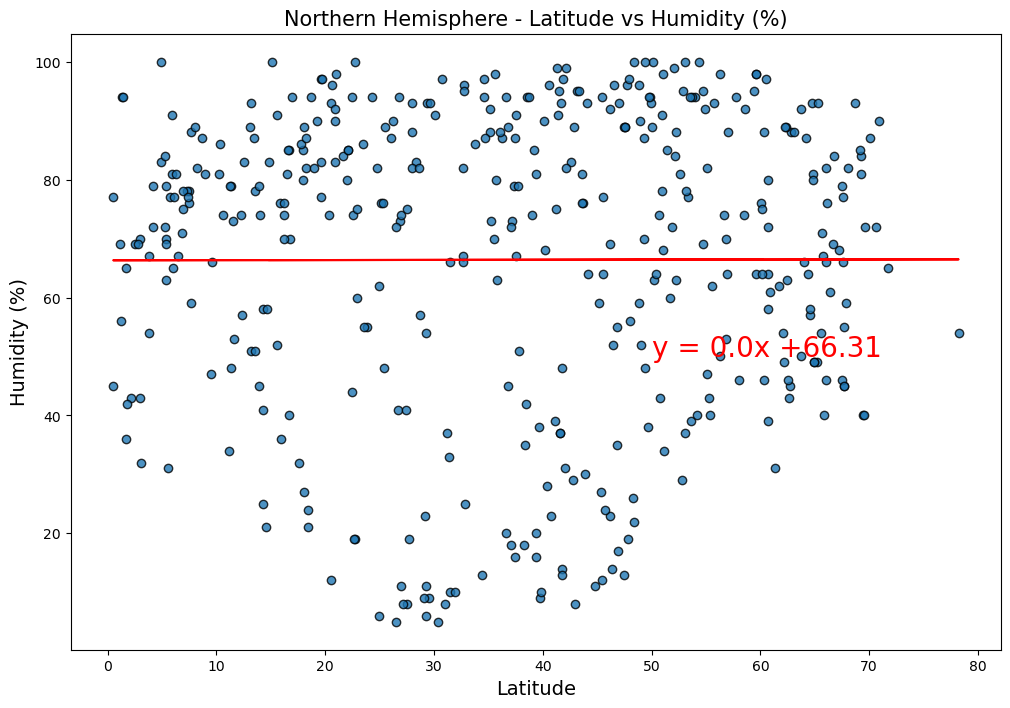

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Plot the linear regression and save r value
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))

# Save the output to png
plt.savefig("./output_data/northern_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

The r-value is: 0.0034689903904610913
The correlation between both factors is -0.06


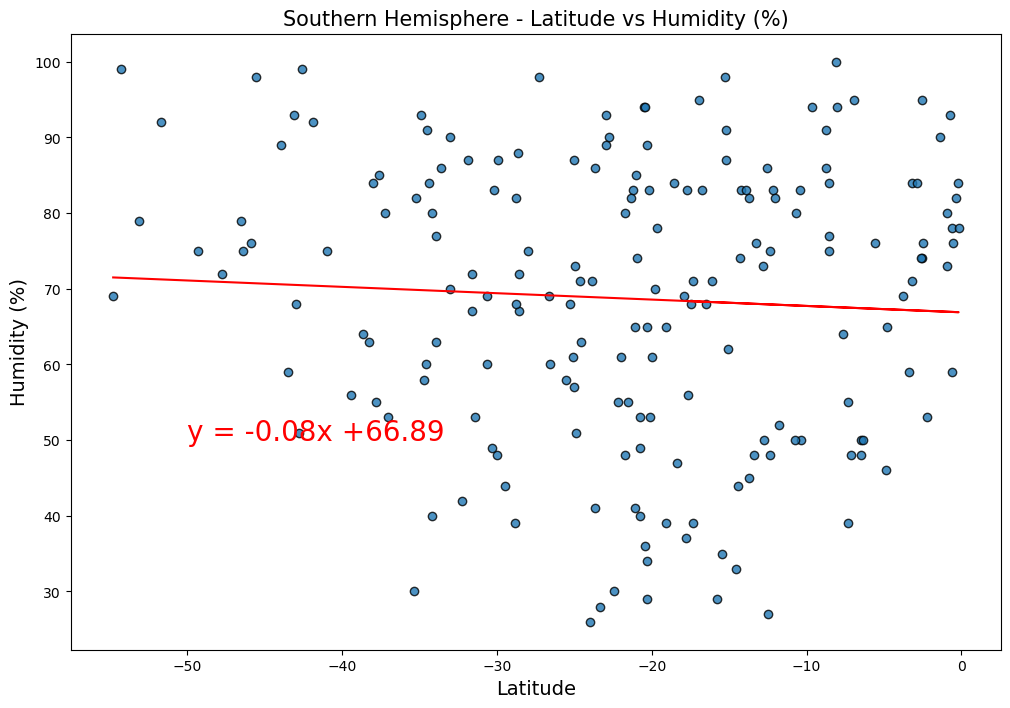

In [215]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Plot the regression, calculate r value
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (-50, 50))

# Save the output as png
plt.savefig("./output_data/southern_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** In both scatterplots there can be seen a weak correlation or r value below .005 therefore indicating there is a wek relationship between humidity and latitude in both southern and northen hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 9.839322949136902e-06
The correlation between both factors is 0.0


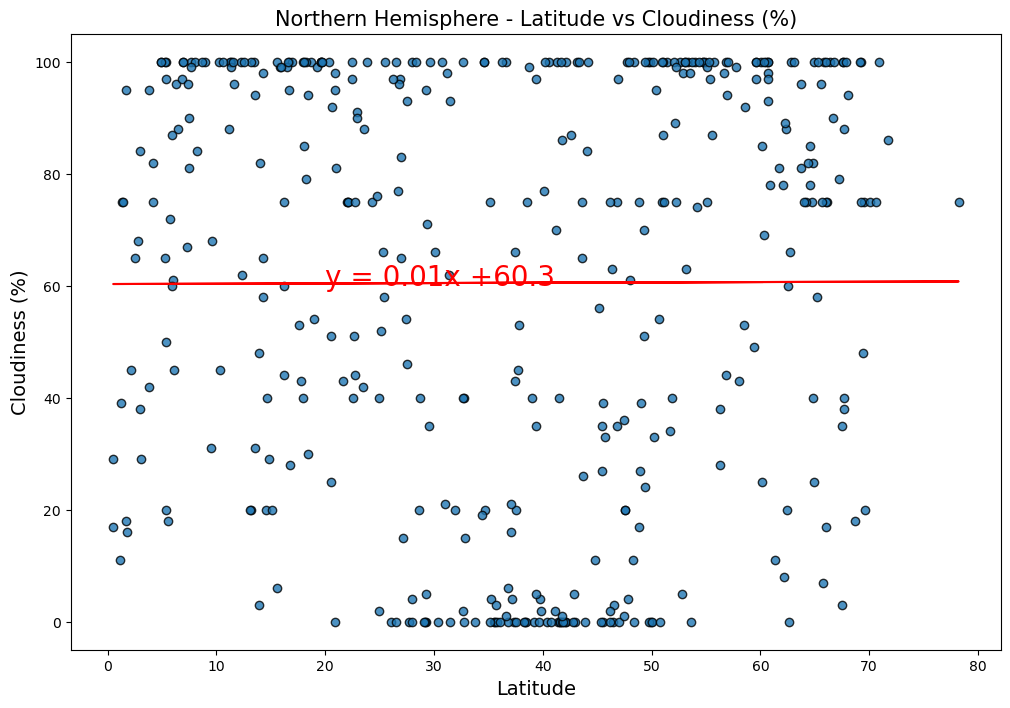

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The r-value is: 0.001834440261611759
The correlation between both factors is -0.04


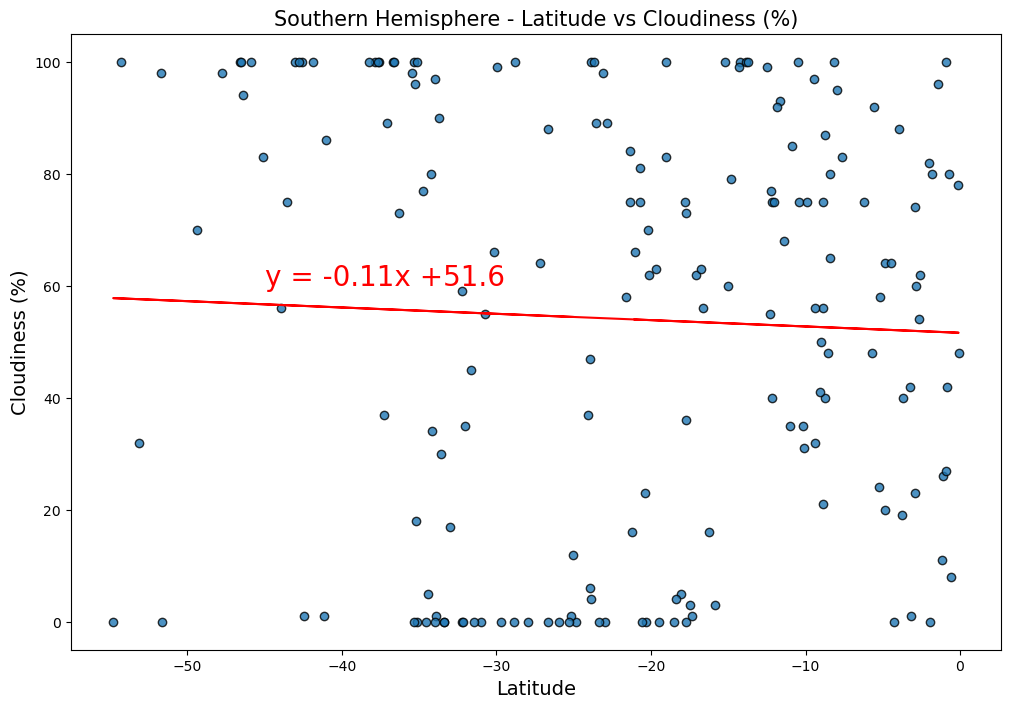

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern", (-45, 60))


plt.savefig("./output_data/southern_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** In both scatterplots the values are too varied to produce a strong correlation, therefore we can conclude there is no correlation between cloudiness and latitude in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06156388824324205
The correlation between both factors is -0.25


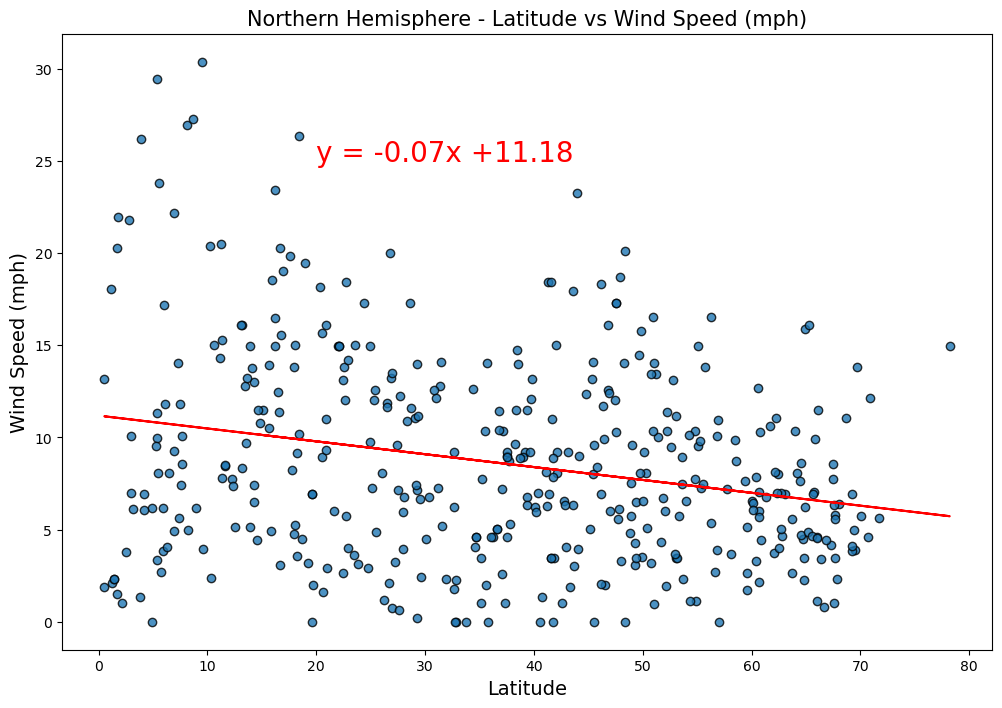

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Plot linear regression and calculate r value
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

# Save the scatterplot as png
plt.savefig("./output_data/northern_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The r-value is: 0.002863034790467248
The correlation between both factors is -0.05


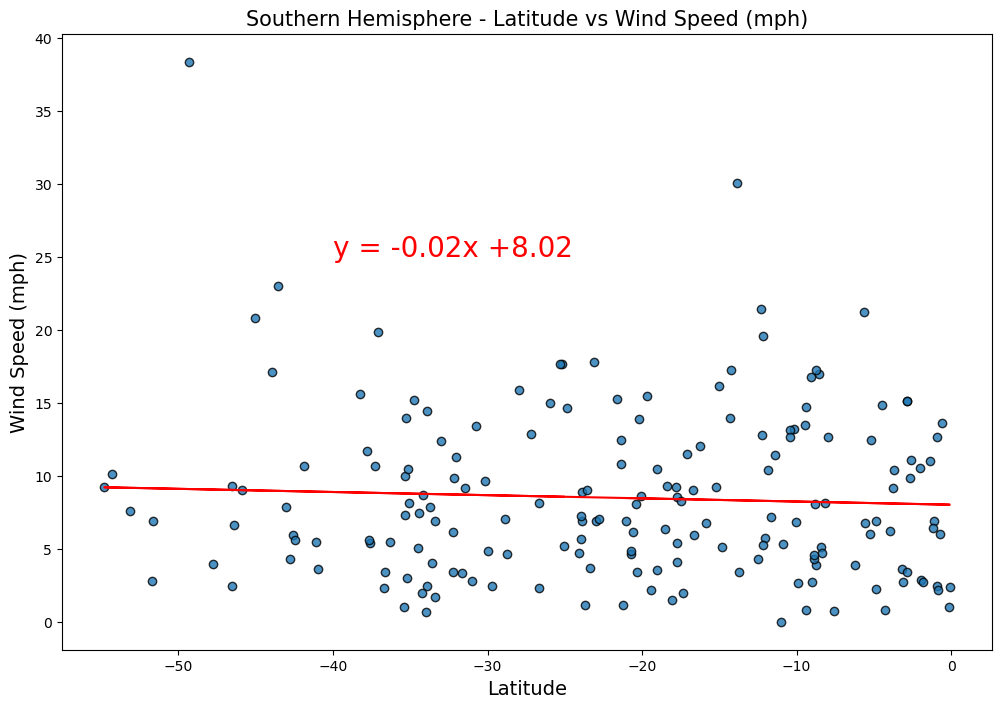

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Plot linear regression and calculate r value
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25))

# Save the scatterplot as png
plt.savefig("./output_data/southern_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** In both scatterplots we can derive no correlation between wind speed and latitude, therefore we can conclude no correlation between distance from the equator and wind speed in either hemisphere. 